<a href="https://colab.research.google.com/github/criddle858/PyLTEs/blob/master/LTE_multi_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

!git clone https://github.com/criddle858/PyLTEs.git

Cloning into 'PyLTEs'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1186 (delta 48), reused 28 (delta 7), pack-reused 1099
Receiving objects: 100% (1186/1186), 1.11 MiB | 7.13 MiB/s, done.
Resolving deltas: 100% (793/793), done.


3-sector antenna model:
https://www.kt.tu-darmstadt.de/media/kt/publikationen_1/10/17/WPC_16_Dandanov.pdf

TR 36.814_170

Antenna products:
https://www.kathreinusa.com/  

0 degree downtilt = level
N degree downtilt = antenna tilts down N degrees

https://drive.google.com/uc?id=14hJ1zpmnlF1zhf0B0q9quhHLrC-cQSAX


In [4]:
cd PyLTEs

/content/PyLTEs


In [20]:
from pyltes.network import CellularNetwork

network = CellularNetwork()
#
# BS means base station for omnidirection
# BS means cell (3-cells per base statin) for non-omnidirectional
#
cellRadius = 250 # meters
network.Generator.createHoneyccrBSdeployment(cellRadius, numberOfBS=6, omnidirectionalAntennas=False, SFR=False)
print("Network size: {:0.0f} by {:0.0f} meters".format(network.constraintAreaMaxX,network.constraintAreaMaxY))
network.setPowerInAllBS(40) # dBm
network.calcAntennaGainsInAllBS()
# network.printPowersInBS()
# network.printXYInBS()

Network is 2 by 1
Network size: 1083 by 500 meters


In [0]:
network.clearConnectedUE()

In [0]:
# Add UE, additional base stations, obstacles, etc.

# network.addOneBSTower(11500,8500, omnidirectional  = True)
# network.bs[36].insidePower = 30
# network.bs[36].outsidePower = 30

#network.Generator.insertUErandomly(3)
network.Generator.insertUEingrid(64)

base_x = 173.20508075688772
base_y = 175
offset_x = 200
offset_y = 200

UE_number = len(network.ue) + 1 # get the next UE ID
#network.Generator.insertUE(base_x + offset_x,base_y + offset_y,UE_number)

myObstacle = [450, 500, 1250, 500, 100]
network.obstacles.append(myObstacle)
# myObstacle = [1050, 500, 1050, 800, 100]
# network.obstacles.append(myObstacle)
# myObstacle = [1050, 800, 750, 800, 100]
# network.obstacles.append(myObstacle)
# myObstacle = [750, 800, 750, 500, 100]
network.obstacles.append(myObstacle)
print("added obstacles:")
print (network.obstacles)

In [0]:
for _ in range(len(network.bs)):
  network.bs[_].tilt = 15
  network.bs[_].height = 20

# New Section

In [0]:
def calcNetworkSumRate():  
  SINRs = np.array(network.calculateSINRVectorForAllUE())
  return np.sum(np.log(1+10**(SINRs)))

In [24]:
print("connecting UE to the best (highest SINR) BS")
network.connectUsersToTheBestBS()

connecting UE to the best (highest SINR) BS


In [25]:
print("Network sum rate is {:.1f} over {:0} UE".format(calcNetworkSumRate(), len(network.ue)))

Network sum rate is 1436.7 over 64 UE


In [0]:
for _ in range(len(network.bs)):
  network.bs[_].height = 250
  network.bs[_].tilt = 5
network.connectUsersToTheBestBS()

In [27]:
print(len(network.bs))


6


In [30]:
#
# Drawing the network takes some time, but is a nice visualizing tool
# Generates a ".png" file with the given filename
# fillMethod options include "SINR", "RSRP", "Sectors_ccr"
#
network.Printer.drawNetwork(fillMethod="SINR", filename="36AntSinrMap", tilesInLine=100, obstacles=True, colorMinValue=-40, colorMaxValue=40)
# network.Printer.drawNetwork(fillMethod="RSRP", filename="36AntSinrMap", tilesInLine=100, obstacles=True, colorMinValue=-100, colorMaxValue=0)
# network.Printer.drawNetwork(fillMethod="Sectors", filename="36AntSinrMap", colorMap = 'Paired', tilesInLine=100, obstacles=True, colorMinValue=0, colorMaxValue=len(network.bs))

testing something really special


/content/PyLTEs/pyltes/printer.py:97: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(-40, 40) #end


<Figure size 576x576 with 0 Axes>

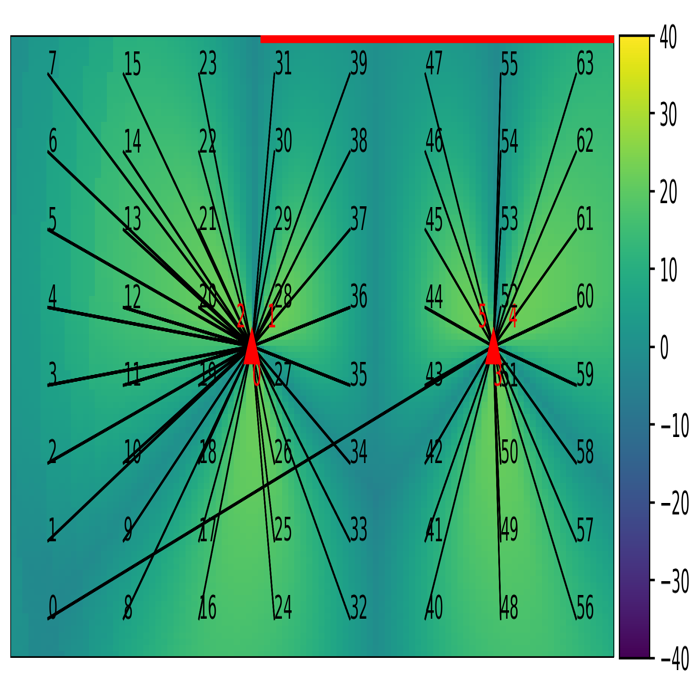

In [0]:
from PIL import Image

image = Image.open('36AntSinrMap.png')
newImage = image.resize((700, 700))
newImage.save('36AntSinrMap-resized.png')

from IPython.display import Image, display
display(Image('36AntSinrMap-resized.png'))

In [0]:
for ccr_ue in [0, 43]:
  for ccr_bs in [0,1,2,3,4,5]:
    print("ue:{:d}\tbs:{:d}\tdist:{:0.1f}\tloss:{:0.1f}\tgain:{:0.1f}"\
          .format(ccr_ue, ccr_bs,network.ue[ccr_ue].distanceToBS(network.bs[ccr_bs])\
                  ,network.ue[ccr_ue].calculatePathLoss(40, network.ue[ccr_ue].distanceToBS(network.bs[ccr_bs]))\
                  ,network.ue[ccr_ue].calcAntennaGain(network.bs[ccr_bs]) ))

# print (network.bs[0].hGain)
# print(network.ue[0].distanceToBS(network.bs[5]))
# print(network.ue[43].distanceToBS(network.bs[5]))
# print(network.ue[0].calculatePathLoss(40, network.ue[0].distanceToBS(network.bs[5])))
# print(network.ue[43].calculatePathLoss(40, network.ue[43].distanceToBS(network.bs[5]))


ue:0	bs:0	dist:425.9	loss:-74.2	gain:-13.8
ue:0	bs:1	dist:425.9	loss:-74.2	gain:-30.0
ue:0	bs:2	dist:425.9	loss:-74.2	gain:-13.8
ue:0	bs:3	dist:827.8	loss:-85.0	gain:-10.8
ue:0	bs:4	dist:827.8	loss:-85.0	gain:-22.0
ue:0	bs:5	dist:827.8	loss:-85.0	gain:-2.0
ue:43	bs:0	dist:312.4	loss:-69.1	gain:-22.3
ue:43	bs:1	dist:312.4	loss:-69.1	gain:-8.2
ue:43	bs:2	dist:312.4	loss:-69.1	gain:-30.0
ue:43	bs:3	dist:126.1	loss:-54.3	gain:-19.1
ue:43	bs:4	dist:126.1	loss:-54.3	gain:-30.0
ue:43	bs:5	dist:126.1	loss:-54.3	gain:-9.7


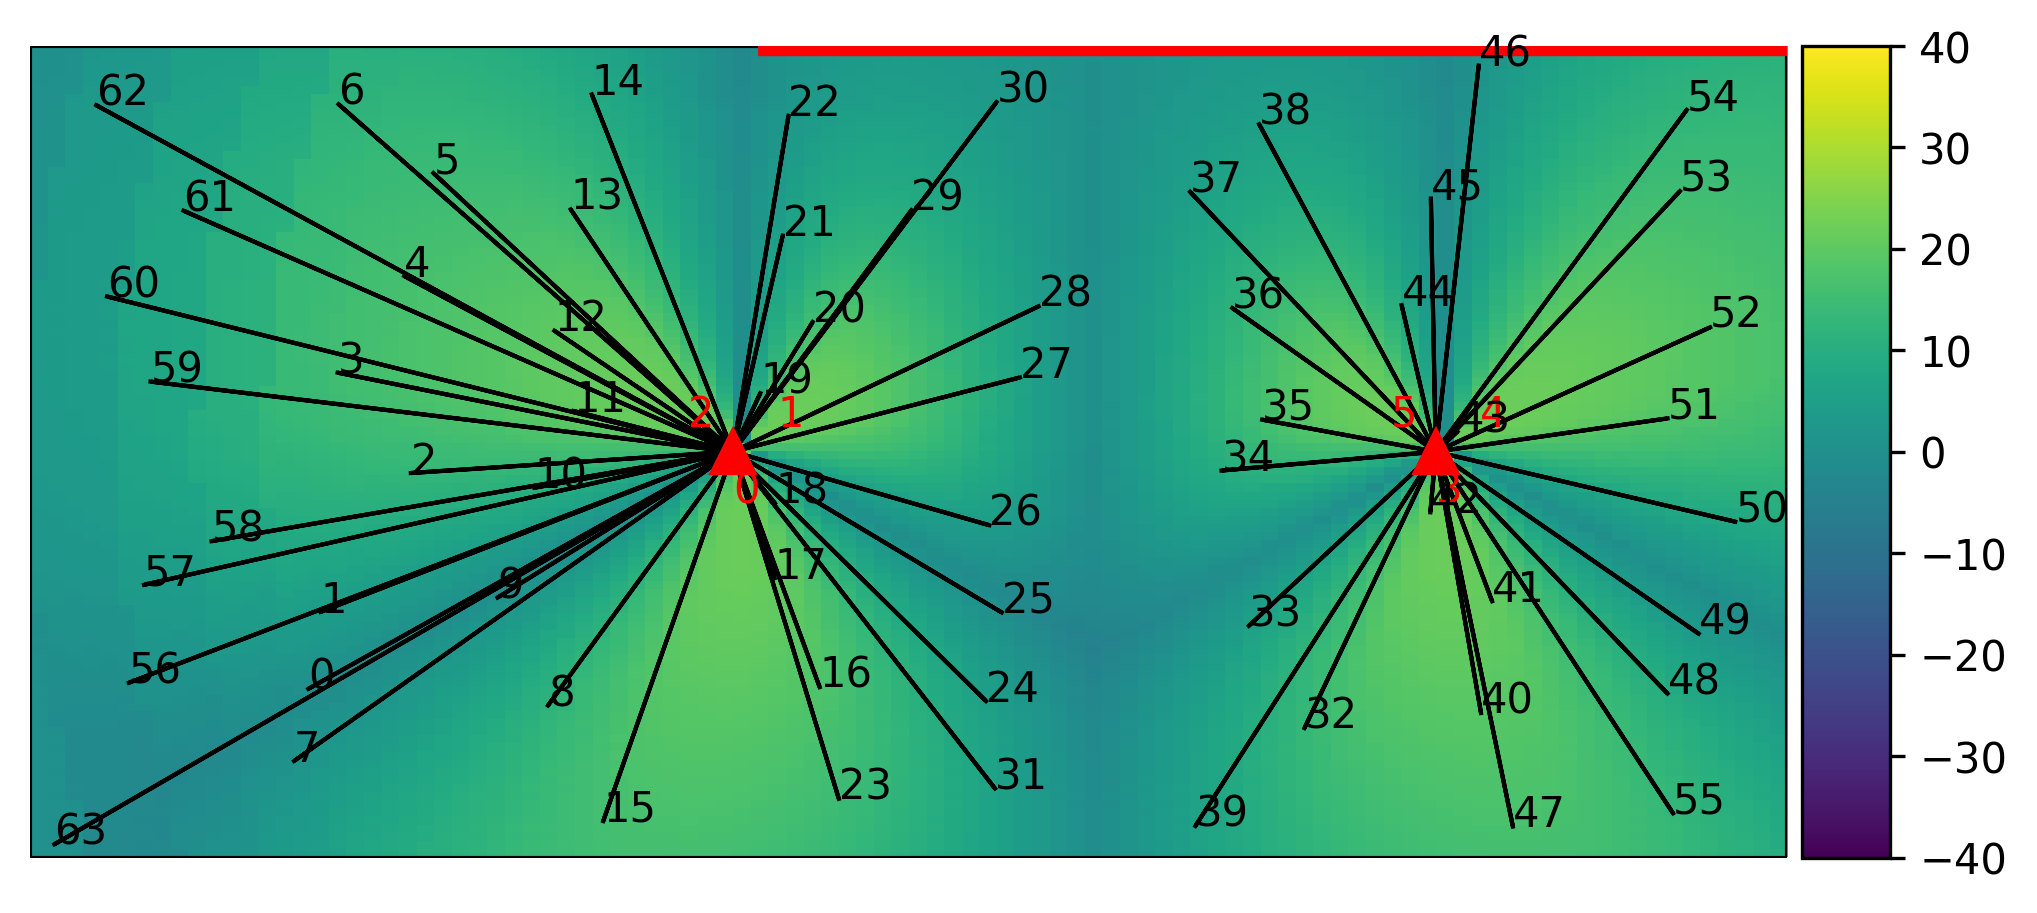

BS 1 :
  UE[ 19 ] dist: 39.908198590618895 SINR: 14.464460793882933 RSRP: -35.17831093556871
  UE[ 20 ] dist: 93.82580512861195 SINR: 17.391046612543516 RSRP: -37.19340211403085
  UE[ 21 ] dist: 136.64677060347802 SINR: 7.301673675378012 RSRP: -50.12648804066959
  UE[ 22 ] dist: 209.77290661011534 SINR: 4.950383225573759 RSRP: -62.43229873440674
  UE[ 26 ] dist: 164.3753823495683 SINR: 6.145487305312396 RSRP: -55.88615314159996
  UE[ 27 ] dist: 182.67575860834998 SINR: 9.663353034330806 RSRP: -53.55356668645328
  UE[ 28 ] dist: 208.56590558195768 SINR: 5.718114989541652 RSRP: -56.450822468839156
  UE[ 29 ] dist: 185.04720057264663 SINR: 14.184309294012907 RSRP: -54.71576231166482
  UE[ 30 ] dist: 269.75296808056186 SINR: 5.1767225369420515 RSRP: -63.73813241916274


<Figure size 576x576 with 0 Axes>

In [0]:
from IPython.display import clear_output

for _ in range(len(network.bs)):
  network.bs[_].tilt = 15
  network.bs[_].height = 20

targetBS = 1
for _ in range(10):
    network.moveUE(0.025)
    network.clearConnectedUE()
    network.connectUsersToTheBestBS()
    network.updateBSconnectedUELists()
    network.Printer.drawNetwork(fillMethod="SINR", filename="36AntSinrMap", tilesInLine=100, obstacles=True, colorMinValue=-40, colorMaxValue=40)
    clear_output(wait=True)
    display(Image('36AntSinrMap.png'))
    connectedUE = network.bs[targetBS].connectedUE
    print("BS", targetBS,":")
    for _ in connectedUE:
      [SINR,RSRP] = network.ue[_].calculateSINR(network.bs, network.obstacles)
      print("  UE[",_,"]","dist:",network.ue[_].distanceToBS(network.bs[targetBS]),"SINR:",SINR,"RSRP:",RSRP)

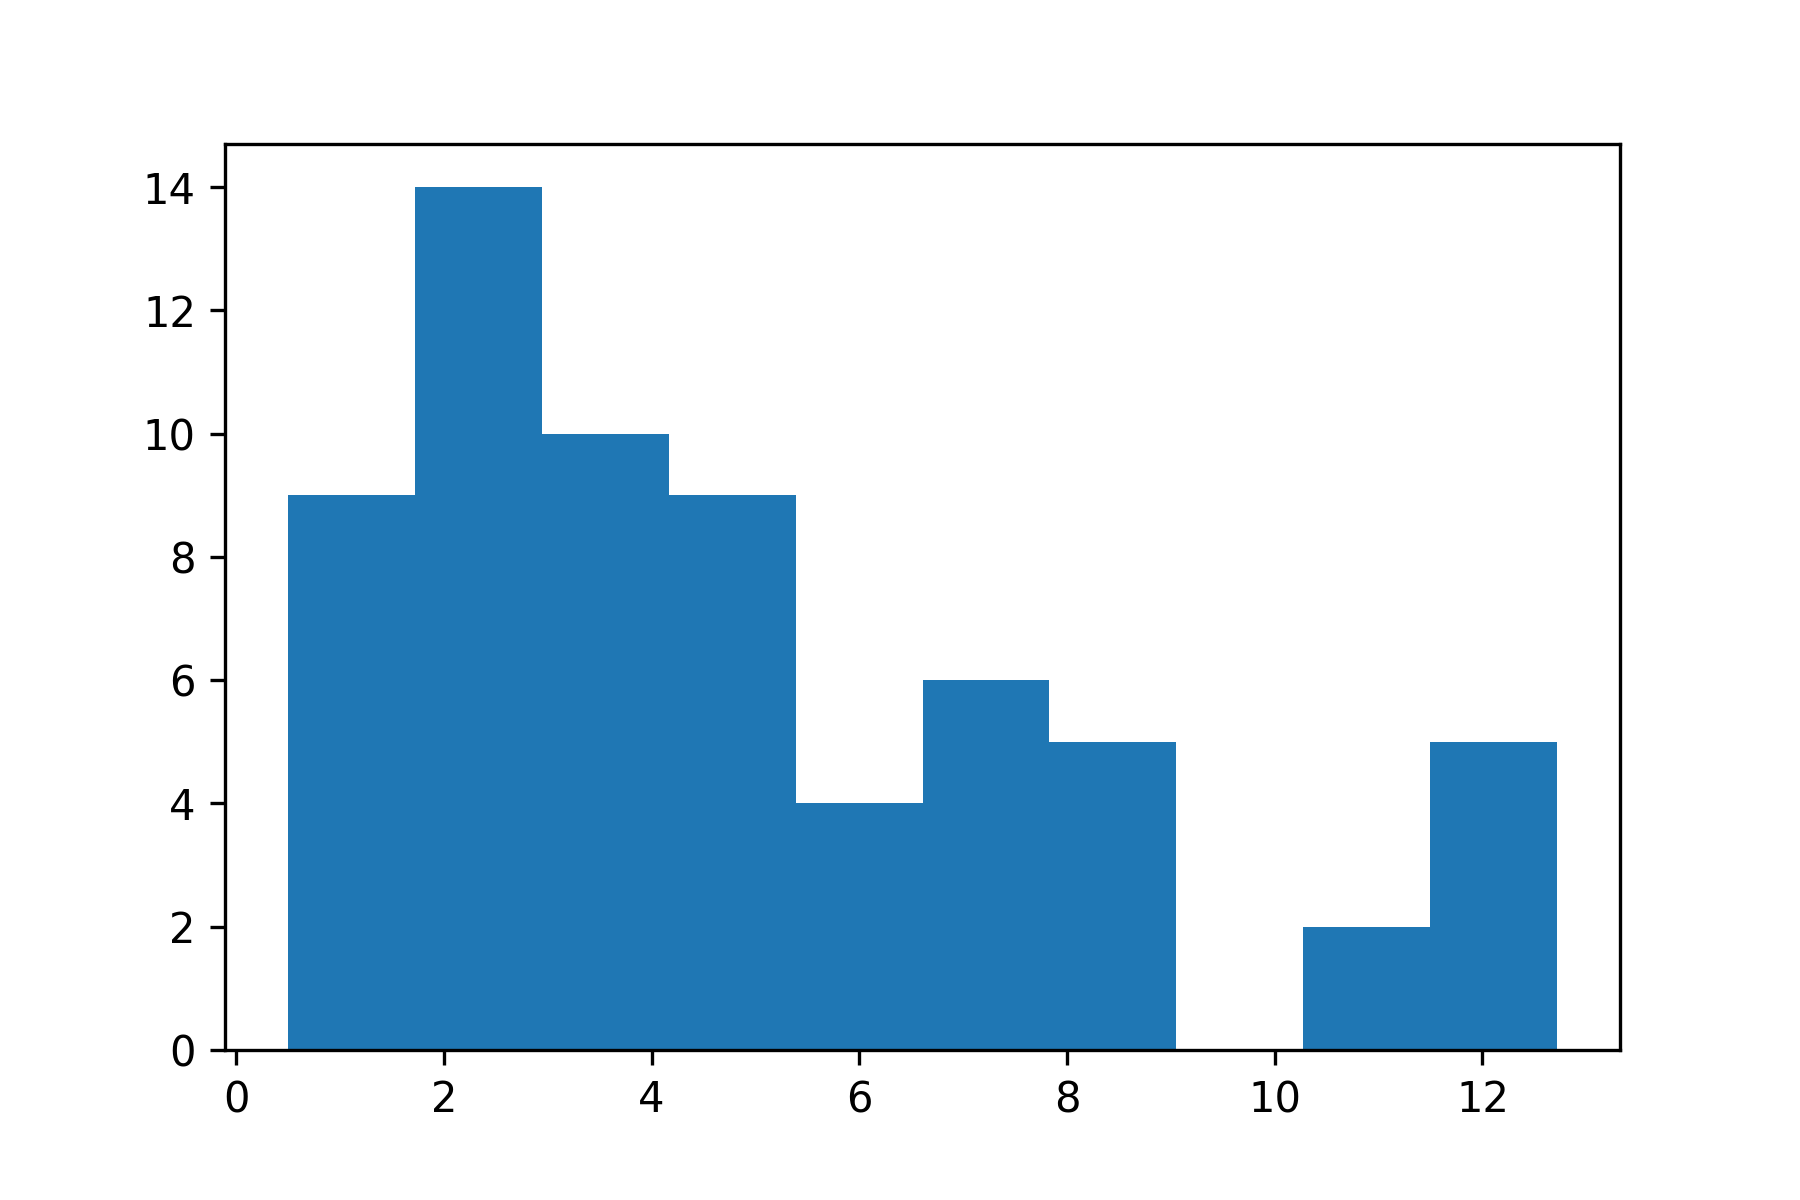

<Figure size 432x288 with 0 Axes>

In [0]:
network.Printer.drawHistogramOfUEThroughput('ccr')
display(Image('ccr.png'))

In [0]:
network.clearConnectedUE()

In [0]:
from IPython.display import clear_output
targetBS = 20
for _ in range(10):
    network.moveUE(0.01)
    network.clearConnectedUE()
    network.connectUsersToTheBestBS()
    network.updateBSconnectedUELists()
    clear_output(wait=True)
    connectedUE = network.bs[targetBS].connectedUE
    print("BS", targetBS,":")
    for _ in connectedUE:
      [SINR,RSRP] = network.ue[_].calculateSINR(network.bs, network.obstacles)
      print("  UE[",_,"]","dist:",network.ue[_].distanceToBS(network.bs[targetBS]),"SINR:",SINR,"RSRP:",RSRP)

IndexError: ignored

In [0]:
print("Number of UE = ", len(network.ue))

for i in range(len(network.ue)):
  thisUE = network.ue[i]
  thisUE.connectedToBS = 0
  [SINR0, RSRP0] = thisUE.calculateSINR(network.bs, network.obstacles) 
  thisUE.connectToTheBestBS(network.bs, network.obstacles)
  [SINR, RSRP] = thisUE.calculateSINR(network.bs, network.obstacles)
  print (thisUE.x, thisUE.y, thisUE.connectedToBS, thisUE.distanceToBS(network.bs[0]), SINR, thisUE.calculateWallLoss(thisUE.connectedToBS, network.bs, network.obstacles))
  


In [0]:
#myObstacle = [1500,2000,2500,3000,100]
#network.obstacles.append(myObstacle)
myObstacle = [8000, 8000, 13000, 8000, 70]
network.obstacles.append(myObstacle)
myObstacle = [13000, 8000, 13000, 11000, 70]
network.obstacles.append(myObstacle)
myObstacle = [13000, 12000, 8000, 12000, 70]
network.obstacles.append(myObstacle)
myObstacle = [8000, 12000, 8000, 8000, 70]
network.obstacles.append(myObstacle)

#print("before (",network.ue[1].x, ",",network.ue[1].y,")")
#for i in range(0,20):
#  if(network.ue[i].x < 300):
#    network.ue[i].x = 0
#  else:
#    network.ue[i].x -= 300
#  if(network.ue[i].y < 300):
#    network.ue[i].y = 0
#  else:
#    network.ue[i].y -= 300
#print("after (",network.ue[1].x, ",",network.ue[1].y,")")
print("added obstacles:")
print (network.obstacles)

In [0]:
for _ in range(len(network.bs)):
  network.bs[_].height = 250
  network.bs[_].tilt = 0

In [0]:
network.moveUE(0.1)
network.connectUsersToTheBestBS()


In [0]:
#network.Printer.drawNetwork(fillMethod="Sectors", filename="movedUE", obstacles=True)
#network.Printer.drawNetwork(fillMethod="SINR", filename="movedUE", obstacles=True)
network.Printer.drawNetwork(fillMethod="SINR", filename="movedUE", obstacles=True, colorMinValue=-40, colorMaxValue=40)

from PIL import Image
image = Image.open('movedUE.png')
newImage = image.resize((440, 600))
newImage.save('movedUE-smaller.png')

from IPython.display import Image, display
display(Image('movedUE-smaller.png'))

In [0]:
#network.saveNetworkToFile('my_network')
network.printPowersInBS()

In [0]:
print(network.bs[4].tilt)

In [0]:
def ueStatsInBS( targetBS ):
  print("total number of UE:", len(network.ue))
  connected_UE = []
  print("target BS:", targetBS)
  for _ in range(len(network.ue)):
    if(network.ue[_].connectedToBS == targetBS):
      connected_UE.append(_)
      UE_SINR, UE_RSRQ = network.ue[_].calculateSINR(network.bs)
      print("found UE", _, "dist", "{:.0f}".format(network.ue[_].distanceToBS(network.bs[targetBS])), end=" ")
      print("V_angle", "{:.2f}".format(network.ue[_].vAngleFromBS(network.bs[targetBS])), end=" ")
      print("H_angle", "{:.2f}".format(network.ue[_].hAngleFromBS(network.bs[targetBS])), end=" ")
      print("SINR",    "{:.2f}".format(UE_SINR), "RSRQ", "{:.2f}".format(UE_RSRQ), end=" ")
      print("AntGain", "{:.2f}".format(network.ue[_].calcAntennaGain(network.bs[targetBS])))
ueStatsInBS(4)

In [0]:
for tilt_angle in range(0,30):
  for _ in range(len(network.bs)):
    network.bs[_].tilt = tilt_angle
    network.bs[_].height = 20
  network.connectUsersToTheBestBS()
  SINRs = np.array(network.calculateSINRVectorForAllUE())
  print("Antenna tilt", tilt_angle, "Network sum rate = ", np.sum(np.log(1+10**(SINRs/10))))

In [0]:
for _ in range(len(network.bs)):
  network.bs[_].height = 200
  network.bs[_].tilt = 0
network.connectUsersToTheBestBS()
for step in range(15):
  tilt_BS = 3
  target_BS = 8
  # network.moveUE(0.01)
  print("BS", tilt_BS, "tilt=", network.bs[tilt_BS].tilt)  
  # network.connectUsersToTheBestBS()
  ueStatsInBS(target_BS)
  network.bs[tilt_BS].tilt += 1

# from pprint import pprint
# pprint(vars(network.bs[0]))

In [0]:
#network.returnSumOfThroughput(1,50)
network.calculateSINRVectorForAllUE()